In [1]:
1+1

2

# Import Dependancies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


## Matplotlib Colors

In [4]:
import math

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle


def plot_colortable(colors, *, ncols=4, sort_colors=True):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * ncols + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * ncols)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

# Load the data and Pre Process

## Preprocess the csv files

In [106]:
def clean_csv(filename):

    with open(f'../data/{filename}.csv', 'r') as file:
        data = file.read()

    # Split data into lines
    lines = data.split('\n')
    data_split = [line.split('\t') for line in lines if line]

    # Create DataFrame
    df = pd.DataFrame(data_split[1:], columns=data_split[0])
    df['DATETIME'] = pd.to_datetime(df['<DATE>'] + ' ' + df['<TIME>'])
    df.drop(columns=['<DATE>', '<TIME>'], inplace=True)

    # Rename columns
    df.rename(columns={
        '<OPEN>': f'OPEN_{filename}',
        '<HIGH>': f'HIGH_{filename}',
        '<LOW>': f'LOW_{filename}',
        '<CLOSE>': f'CLOSE_{filename}',
        '<TICKVOL>': f'TICKVOL_{filename}',
        '<SPREAD>': f'SPREAD_{filename}'
    }, inplace=True)

    df = df[['DATETIME', f'OPEN_{filename}', f'HIGH_{filename}', f'LOW_{filename}', f'CLOSE_{filename}', f'TICKVOL_{filename}', f'SPREAD_{filename}']]

    numeric_cols = [f'OPEN_{filename}', f'HIGH_{filename}', f'LOW_{filename}', f'CLOSE_{filename}', f'TICKVOL_{filename}', f'SPREAD_{filename}']
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

    # Set the datetime column as index
    df = df.set_index('DATETIME')

    return df




In [107]:
b300_1h = clean_csv('Boom_300_1h')

In [108]:
b300_1h.head()

OPEN_Boom_300_1h  HIGH_Boom_300_1h  LOW_Boom_300_1h  \
DATETIME                                                                   
2021-07-30 11:00:00          9839.038          9890.855         9768.512   
2021-07-30 12:00:00          9833.370          9874.833         9744.516   
2021-07-30 13:00:00          9866.121          9883.364         9782.826   
2021-07-30 14:00:00          9828.497          9828.497         9703.011   
2021-07-30 15:00:00          9702.944          9779.034         9585.119   

                     CLOSE_Boom_300_1h  TICKVOL_Boom_300_1h  \
DATETIME                                                      
2021-07-30 11:00:00           9833.501                 2836   
2021-07-30 12:00:00           9866.241                 3590   
2021-07-30 13:00:00           9828.654                 3588   
2021-07-30 14:00:00           9703.011                 3590   
2021-07-30 15:00:00           9585.119                 3590   

                     SPREAD_Boom_300_1h  
DATETIME                                 
2021-07-30 11:00:00                 488  
2021-07-30 12:00:00                 487  
2021-07-30 13:00:00                 489  
2021-07-30 14:00:00                 485  
2021-07-30 15:00:00                 479

In [109]:
# pre process raw csv files and load the processed dataframes

b500_1h = clean_csv('Boom_500_1h')
b1000_1h = clean_csv('Boom_1000_1h')
c300_1h = clean_csv('Crash_300_1h')
c500_1h = clean_csv('Crash_500_1h')
c1000_1h = clean_csv('Crash_1000_1h')
v10_1h = clean_csv('v10_1h')
v10_1s_1h = clean_csv('v10_1s_1h')
v50_1h = clean_csv('v50_1h')
v50_1s_1h = clean_csv('v50_1s_1h')
v75_1h = clean_csv('v75_1h')
v75_1s_1h = clean_csv('v75_1s_1h')
v100_1h = clean_csv('v100_1h')
v100_1s_1h = clean_csv('v100_1s_1h')

In [122]:
dfs = [b300_1h, b500_1h, b1000_1h, c300_1h, c500_1h, c1000_1h, v10_1h, v10_1s_1h, v50_1h, v50_1s_1h, v75_1h, v75_1s_1h, v100_1h, v100_1s_1h]

In [123]:
# get the recent date from all dfs

for i, df in enumerate(dfs):
    _ = df.index[0]
    print(i, ' ', _)


0   2021-07-30 11:00:00
1   2019-07-12 08:00:00
2   2019-04-17 09:00:00
3   2021-07-30 11:00:00
4   2019-07-12 08:00:00
5   2019-04-17 09:00:00
6   2019-01-01 05:00:00
7   2019-09-24 10:00:00
8   2019-01-01 05:00:00
9   2020-06-03 02:00:00
10   2019-01-01 05:00:00
11   2020-06-03 02:00:00
12   2019-01-01 05:00:00
13   2019-09-24 10:00:00


### B300, C300, V50 1s and V75 1s data will be dropped

In [124]:
df_list = [b500_1h, b1000_1h, c500_1h, c1000_1h, v10_1h, v10_1s_1h, v50_1h, v75_1h, v100_1h, v100_1s_1h]

In [125]:
for i, df in enumerate(df_list):
    _ = df.index[0]
    print(i, ' ', _)

0   2019-07-12 08:00:00
1   2019-04-17 09:00:00
2   2019-07-12 08:00:00
3   2019-04-17 09:00:00
4   2019-01-01 05:00:00
5   2019-09-24 10:00:00
6   2019-01-01 05:00:00
7   2019-01-01 05:00:00
8   2019-01-01 05:00:00
9   2019-09-24 10:00:00


In [126]:
#concatenate all the dataframes 

dfc = pd.concat(df_list, axis=1, join='outer')

In [127]:
# remove missing value rows

dff=dfc.dropna()

In [128]:
# max null value

max(dff.isna().sum())

0

In [130]:
dff.tail()

OPEN_Boom_500_1h  HIGH_Boom_500_1h  LOW_Boom_500_1h  \
DATETIME                                                                   
2024-06-05 11:00:00          5549.968          5574.897         5545.361   
2024-06-05 12:00:00          5571.791          5584.975         5562.126   
2024-06-05 13:00:00          5572.613          5577.513         5560.821   
2024-06-05 14:00:00          5560.794          5565.369         5551.378   
2024-06-05 15:00:00          5554.247          5554.247         5545.857   

                     CLOSE_Boom_500_1h  TICKVOL_Boom_500_1h  \
DATETIME                                                      
2024-06-05 11:00:00           5571.813               3524.0   
2024-06-05 12:00:00           5572.614               3501.0   
2024-06-05 13:00:00           5560.821               3507.0   
2024-06-05 14:00:00           5554.248               3512.0   
2024-06-05 15:00:00           5547.663               1535.0   

                     SPREAD_Boom_500_1h  OPEN_Boom_1000_1h  HIGH_Boom_1000_1h  \
DATETIME                                                                        
2024-06-05 11:00:00                77.0          15773.427          15783.974   
2024-06-05 12:00:00                77.0          15772.149          15786.650   
2024-06-05 13:00:00                77.0          15775.712          15777.547   
2024-06-05 14:00:00                77.0          15761.982          15761.982   
2024-06-05 15:00:00                77.0          15749.473          15749.473   

                     LOW_Boom_1000_1h  CLOSE_Boom_1000_1h  ...  LOW_v100_1h  \
DATETIME                                                   ...                
2024-06-05 11:00:00         15766.719           15772.150  ...      1628.53   
2024-06-05 12:00:00         15761.744           15775.728  ...      1631.35   
2024-06-05 13:00:00         15744.566           15761.985  ...      1624.18   
2024-06-05 14:00:00         15718.093           15749.478  ...      1617.93   
2024-06-05 15:00:00         15729.533           15729.533  ...      1609.34   

                     CLOSE_v100_1h  TICKVOL_v100_1h  SPREAD_v100_1h  \
DATETIME                                                              
2024-06-05 11:00:00        1636.56             1785              43   
2024-06-05 12:00:00        1635.00             1789              43   
2024-06-05 13:00:00        1630.75             1788              43   
2024-06-05 14:00:00        1637.47             1788              43   
2024-06-05 15:00:00        1618.07             1537              43   

                     OPEN_v100_1s_1h  HIGH_v100_1s_1h  LOW_v100_1s_1h  \
DATETIME                                                                
2024-06-05 11:00:00           818.14           822.28          810.75   
2024-06-05 12:00:00           814.83           817.85          806.44   
2024-06-05 13:00:00           815.48           821.70          812.27   
2024-06-05 14:00:00           816.21           822.59          810.42   
2024-06-05 15:00:00           822.25           827.58          819.67   

                     CLOSE_v100_1s_1h  TICKVOL_v100_1s_1h  SPREAD_v100_1s_1h  
DATETIME                                                                      
2024-06-05 11:00:00            814.79              3488.0               23.0  
2024-06-05 12:00:00            815.40              3498.0               23.0  
2024-06-05 13:00:00            815.95              3501.0               23.0  
2024-06-05 14:00:00            822.20              3507.0               23.0  
2024-06-05 15:00:00            826.60              3109.0               23.0  

[5 rows x 60 columns]

In [131]:
dff.describe()

OPEN_Boom_500_1h  HIGH_Boom_500_1h  LOW_Boom_500_1h  CLOSE_Boom_500_1h  \
count      41187.000000      41187.000000     41187.000000       41187.000000   
mean        5940.970232       5954.667666      5927.224143        5940.852443   
std         2143.564952       2148.518928      2138.523954        2143.449919   
min         3171.941000       3180.880000      3168.034000        3171.943000   
25%         4348.665500       4358.409000      4337.778000        4348.671000   
50%         5010.864000       5021.477000      4998.865000        5010.864000   
75%         7329.505000       7347.146000      7315.138000        7329.238000   
max        11079.478000      11092.339000     11057.640000       11079.498000   

       TICKVOL_Boom_500_1h  SPREAD_Boom_500_1h  OPEN_Boom_1000_1h  \
count         41187.000000        41187.000000       41187.000000   
mean           3504.464734           82.498701       11656.943117   
std              56.039610           29.941596        1524.053980   
min             598.000000           44.000000        8746.397000   
25%            3484.000000           60.000000       10453.091500   
50%            3504.000000           69.000000       11186.948000   
75%            3532.000000          102.000000       12829.828500   
max            3573.000000          154.000000       16765.430000   

       HIGH_Boom_1000_1h  LOW_Boom_1000_1h  CLOSE_Boom_1000_1h  ...  \
count       41187.000000      41187.000000        41187.000000  ...   
mean        11675.044447      11639.060765        11657.103547  ...   
std          1526.407415       1521.650225         1524.124200  ...   
min          8762.992000       8718.229000         8746.416000  ...   
25%         10470.399500      10437.540500        10453.178500  ...   
50%         11206.227000      11173.161000        11186.965000  ...   
75%         12850.614000      12811.064500        12829.959500  ...   
max         16768.566000      16716.056000        16765.447000  ...   

        LOW_v100_1h  CLOSE_v100_1h  TICKVOL_v100_1h  SPREAD_v100_1h  \
count  41187.000000   41187.000000     41187.000000    41187.000000   
mean    5909.193410    5958.920095      1789.634909      144.739287   
std     5931.308291    5981.122958        24.339945      130.919409   
min      977.070000     983.610000       304.000000       30.000000   
25%     1852.615000    1868.455000      1785.000000       57.000000   
50%     3384.390000    3411.360000      1792.000000       95.000000   
75%     7775.210000    7844.105000      1797.000000      180.000000   
max    35068.780000   35254.190000      1822.000000      600.000000   

       OPEN_v100_1s_1h  HIGH_v100_1s_1h  LOW_v100_1s_1h  CLOSE_v100_1s_1h  \
count     41187.000000     41187.000000    41187.000000      41187.000000   
mean       4969.241610      5011.023888     4927.361770       4968.988033   
std        4297.882214      4333.968895     4261.668865       4297.815966   
min         546.590000       553.150000      542.250000        546.670000   
25%        1605.835000      1619.375000     1593.355000       1605.965000   
50%        3450.970000      3480.540000     3421.120000       3450.840000   
75%        7647.415000      7709.670000     7581.830000       7646.750000   
max       24982.560000     25094.780000    24637.960000      24980.010000   

       TICKVOL_v100_1s_1h  SPREAD_v100_1s_1h  
count        41187.000000       41187.000000  
mean          3564.995703         150.328914  
std             54.426227         177.427750  
min            611.000000          12.000000  
25%           3551.000000          40.000000  
50%           3577.000000          80.000000  
75%           3589.000000         190.000000  
max           3620.000000         900.000000  

[8 rows x 60 columns]

In [132]:
dff.to_csv('../clean_data/cleaned_data.csv', index=True)

### Predicting the 3rd hours's close price

In [ ]:
dff['b500_pred'] = dff['CLOSE_Boom_500_1h'].shift(-2)
dff['b1000_pred'] = dff['CLOSE_Boom_1000_1h'].shift(-2)
dff['c500_pred'] = dff['CLOSE_Crash_500_1h'].shift(-2)
dff['c1000_pred'] = dff['CLOSE_Crash_1000_1h'].shift(-2)

In [139]:
dff = dff.dropna()

In [154]:
#correlation matrix
corr = dff.corr()

In [155]:
corr

OPEN_Boom_500_1h  HIGH_Boom_500_1h  LOW_Boom_500_1h  \
OPEN_Boom_500_1h             1.000000          0.999977         0.999989   
HIGH_Boom_500_1h             0.999977          1.000000         0.999988   
LOW_Boom_500_1h              0.999989          0.999988         1.000000   
CLOSE_Boom_500_1h            0.999954          0.999989         0.999977   
TICKVOL_Boom_500_1h          0.492137          0.492196         0.492099   
...                               ...               ...              ...   
SPREAD_v100_1s_1h            0.764312          0.764302         0.764317   
b500_pred                    0.999860          0.999896         0.999884   
b1000_pred                  -0.242236         -0.242257        -0.242241   
c500_pred                    0.778972          0.778966         0.778969   
c1000_pred                   0.798814          0.798797         0.798804   

                     CLOSE_Boom_500_1h  TICKVOL_Boom_500_1h  \
OPEN_Boom_500_1h              0.999954             0.492137   
HIGH_Boom_500_1h              0.999989             0.492196   
LOW_Boom_500_1h               0.999977             0.492099   
CLOSE_Boom_500_1h             1.000000             0.492145   
TICKVOL_Boom_500_1h           0.492145             1.000000   
...                                ...                  ...   
SPREAD_v100_1s_1h             0.764297             0.370613   
b500_pred                     0.999907             0.492215   
b1000_pred                   -0.242244            -0.044541   
c500_pred                     0.778940             0.396453   
c1000_pred                    0.798773             0.416848   

                     SPREAD_Boom_500_1h  OPEN_Boom_1000_1h  HIGH_Boom_1000_1h  \
OPEN_Boom_500_1h               0.999942          -0.242496          -0.242417   
HIGH_Boom_500_1h               0.999942          -0.242518          -0.242438   
LOW_Boom_500_1h                0.999953          -0.242501          -0.242421   
CLOSE_Boom_500_1h              0.999930          -0.242504          -0.242424   
TICKVOL_Boom_500_1h            0.492117          -0.044384          -0.044271   
...                                 ...                ...                ...   
SPREAD_v100_1s_1h              0.764278          -0.345207          -0.345186   
b500_pred                      0.999838          -0.242523          -0.242443   
b1000_pred                    -0.242327           0.999525           0.999654   
c500_pred                      0.778971          -0.376293          -0.376317   
c1000_pred                     0.798814          -0.372894          -0.372875   

                     LOW_Boom_1000_1h  CLOSE_Boom_1000_1h  ...  \
OPEN_Boom_500_1h            -0.242449           -0.242412  ...   
HIGH_Boom_500_1h            -0.242471           -0.242432  ...   
LOW_Boom_500_1h             -0.242453           -0.242415  ...   
CLOSE_Boom_500_1h           -0.242457           -0.242418  ...   
TICKVOL_Boom_500_1h         -0.044439           -0.044379  ...   
...                               ...                 ...  ...   
SPREAD_v100_1s_1h           -0.345193           -0.345193  ...   
b500_pred                   -0.242476           -0.242438  ...   
b1000_pred                   0.999595            0.999684  ...   
c500_pred                   -0.376283           -0.376333  ...   
c1000_pred                  -0.372888           -0.372906  ...   

                     OPEN_v100_1s_1h  HIGH_v100_1s_1h  LOW_v100_1s_1h  \
OPEN_Boom_500_1h            0.845158         0.845197        0.845199   
HIGH_Boom_500_1h            0.845134         0.845172        0.845174   
LOW_Boom_500_1h             0.845150         0.845188        0.845190   
CLOSE_Boom_500_1h           0.845120         0.845159        0.845160   
TICKVOL_Boom_500_1h         0.414649         0.414711        0.414637   
...                              ...              ...             ...   
SPREAD_v100_1s_1h           0.931361         0.931307        0.931358   
b

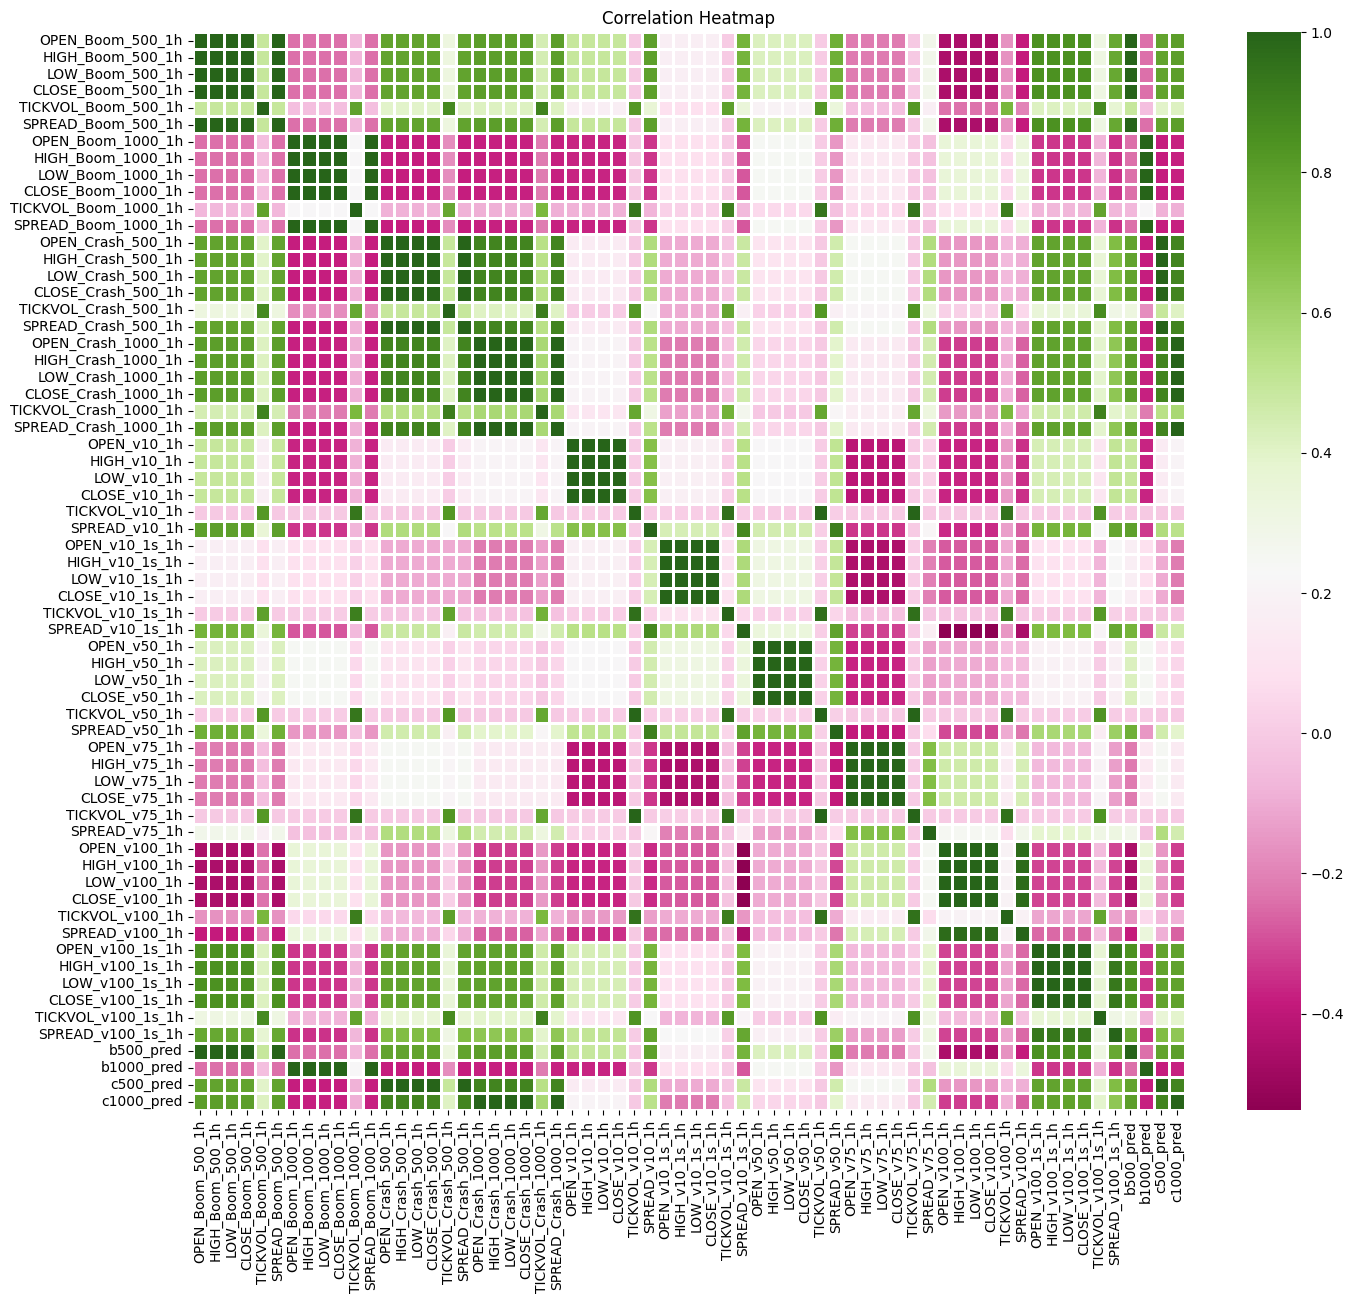

In [168]:
plt.figure(figsize=(16, 14))
sns.heatmap(corr, fmt=".2f", cmap='PiYG', linewidths=1, cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [169]:
dff.to_csv('../clean_data/final.csv', index=True)

In [5]:
dff = pd.read_csv('../clean_data/final.csv')

# Set the Datetime column to dataframe index
dff['DATETIME'] = pd.to_datetime(dff['DATETIME'])
dff.set_index('DATETIME', inplace=True)

In [22]:
dff.tail(5)

OPEN_Boom_500_1h  HIGH_Boom_500_1h  LOW_Boom_500_1h  \
DATETIME                                                                   
2024-06-05 09:00:00          5551.207          5564.021         5539.854   
2024-06-05 10:00:00          5539.846          5559.129         5538.005   
2024-06-05 11:00:00          5549.968          5574.897         5545.361   
2024-06-05 12:00:00          5571.791          5584.975         5562.126   
2024-06-05 13:00:00          5572.613          5577.513         5560.821   

                     CLOSE_Boom_500_1h  TICKVOL_Boom_500_1h  \
DATETIME                                                      
2024-06-05 09:00:00           5539.854               3503.0   
2024-06-05 10:00:00           5549.980               3511.0   
2024-06-05 11:00:00           5571.813               3524.0   
2024-06-05 12:00:00           5572.614               3501.0   
2024-06-05 13:00:00           5560.821               3507.0   

                     SPREAD_Boom_500_1h  OPEN_Boom_1000_1h  HIGH_Boom_1000_1h  \
DATETIME                                                                        
2024-06-05 09:00:00                77.0          15757.751          15797.006   
2024-06-05 10:00:00                77.0          15769.785          15794.061   
2024-06-05 11:00:00                77.0          15773.427          15783.974   
2024-06-05 12:00:00                77.0          15772.149          15786.650   
2024-06-05 13:00:00                77.0          15775.712          15777.547   

                     LOW_Boom_1000_1h  CLOSE_Boom_1000_1h  ...  \
DATETIME                                                   ...   
2024-06-05 09:00:00         15746.639           15769.795  ...   
2024-06-05 10:00:00         15752.910           15773.449  ...   
2024-06-05 11:00:00         15766.719           15772.150  ...   
2024-06-05 12:00:00         15761.744           15775.728  ...   
2024-06-05 13:00:00         15744.566           15761.985  ...   

                     TICKVOL_v100_1s_1h  SPREAD_v100_1s_1h  b500_pred  \
DATETIME                                                                
2024-06-05 09:00:00              3493.0               23.0   5571.813   
2024-06-05 10:00:00              3494.0               23.0   5572.614   
2024-06-05 11:00:00              3488.0               23.0   5560.821   
2024-06-05 12:00:00              3498.0               23.0   5554.248   
2024-06-05 13:00:00              3501.0               23.0   5547.663   

                     b1000_pred  c500_pred  c1000_pred  b500d  b1000d  c500d  \
DATETIME                                                                       
2024-06-05 09:00:00   15772.150   4388.913    5645.395      1       0      0   
2024-06-05 10:00:00   15775.728   4405.652    5657.274      1       0      0   
2024-06-05 11:00:00   15761.985   4396.809    5655.782      0       0      0   
2024-06-05 12:00:00   15749.478   4391.652    5629.893      0       0      0   
2024-06-05 13:00:00   15729.533   4387.600    5621.148      0       0      0   

                     c1000d  
DATETIME                     
2024-06-05 09:00:00       0  
2024-06-05 10:00:00       0  
2024-06-05 11:00:00       0  
2024-06-05 12:00:00       0  
2024-06-05 13:00:00       1  

[5 rows x 68 columns]

####  for Boom 500, We only trade buy options. if pred price - open price >= 20 , it is a good time to trade (1)
#### else it is a bad trade (0)

In [15]:
dff['b500d'] = dff.apply(lambda row: 1 if row['b500_pred'] - row['OPEN_Boom_500_1h'] >= 20 else 0, axis=1)


####  for Boom 1000, We only trade buy options. if pred price - open price >= 20 , it is a good time to trade (1)
#### else it is a bad trade (0)

In [18]:
dff['b1000d'] = dff.apply(lambda row: 1 if row['b1000_pred'] - row['OPEN_Boom_1000_1h'] >= 20 else 0, axis=1)

####  for Crash 500, We only trade sell options. if open price - pred price  >= 20 , it is a good time to trade (1)
#### else it is a bad trade (0)

In [20]:
dff['c500d'] = dff.apply(lambda row: 1 if row['OPEN_Crash_500_1h'] - row['c500_pred'] >= 20 else 0, axis=1)

####  for Crash 1000, We only trade sell options. if open price - pred price  >= 20 , it is a good time to trade (1)
#### else it is a bad trade (0)

In [21]:
dff['c1000d'] = dff.apply(lambda row: 1 if row['OPEN_Crash_1000_1h'] - row['c1000_pred'] >= 20 else 0, axis=1)

In [23]:
dff.to_csv('../clean_data/finalv2.csv', index=True)

# Deep look into prediction data

In [3]:
# Load the csv data
dff = pd.read_csv('../clean_data/final.csv')

# Set the Datetime column to dataframe index
dff['DATETIME'] = pd.to_datetime(dff['DATETIME'])
dff.set_index('DATETIME', inplace=True)

In [4]:
dff.tail(3)

OPEN_Boom_500_1h  HIGH_Boom_500_1h  LOW_Boom_500_1h  \
DATETIME                                                                   
2024-06-05 11:00:00          5549.968          5574.897         5545.361   
2024-06-05 12:00:00          5571.791          5584.975         5562.126   
2024-06-05 13:00:00          5572.613          5577.513         5560.821   

                     CLOSE_Boom_500_1h  TICKVOL_Boom_500_1h  \
DATETIME                                                      
2024-06-05 11:00:00           5571.813               3524.0   
2024-06-05 12:00:00           5572.614               3501.0   
2024-06-05 13:00:00           5560.821               3507.0   

                     SPREAD_Boom_500_1h  OPEN_Boom_1000_1h  HIGH_Boom_1000_1h  \
DATETIME                                                                        
2024-06-05 11:00:00                77.0          15773.427          15783.974   
2024-06-05 12:00:00                77.0          15772.149          15786.650   
2024-06-05 13:00:00                77.0          15775.712          15777.547   

                     LOW_Boom_1000_1h  CLOSE_Boom_1000_1h  ...  \
DATETIME                                                   ...   
2024-06-05 11:00:00         15766.719           15772.150  ...   
2024-06-05 12:00:00         15761.744           15775.728  ...   
2024-06-05 13:00:00         15744.566           15761.985  ...   

                     OPEN_v100_1s_1h  HIGH_v100_1s_1h  LOW_v100_1s_1h  \
DATETIME                                                                
2024-06-05 11:00:00           818.14           822.28          810.75   
2024-06-05 12:00:00           814.83           817.85          806.44   
2024-06-05 13:00:00           815.48           821.70          812.27   

                     CLOSE_v100_1s_1h  TICKVOL_v100_1s_1h  SPREAD_v100_1s_1h  \
DATETIME                                                                       
2024-06-05 11:00:00            814.79              3488.0               23.0   
2024-06-05 12:00:00            815.40              3498.0               23.0   
2024-06-05 13:00:00            815.95              3501.0               23.0   

                     b500_pred  b1000_pred  c500_pred  c1000_pred  
DATETIME                                                           
2024-06-05 11:00:00   5560.821   15761.985   4396.809    5655.782  
2024-06-05 12:00:00   5554.248   15749.478   4391.652    5629.893  
2024-06-05 13:00:00   5547.663   15729.533   4387.600    5621.148  

[3 rows x 64 columns]

## Visualizing highly correlated major pairs

## Boom 500 correlations

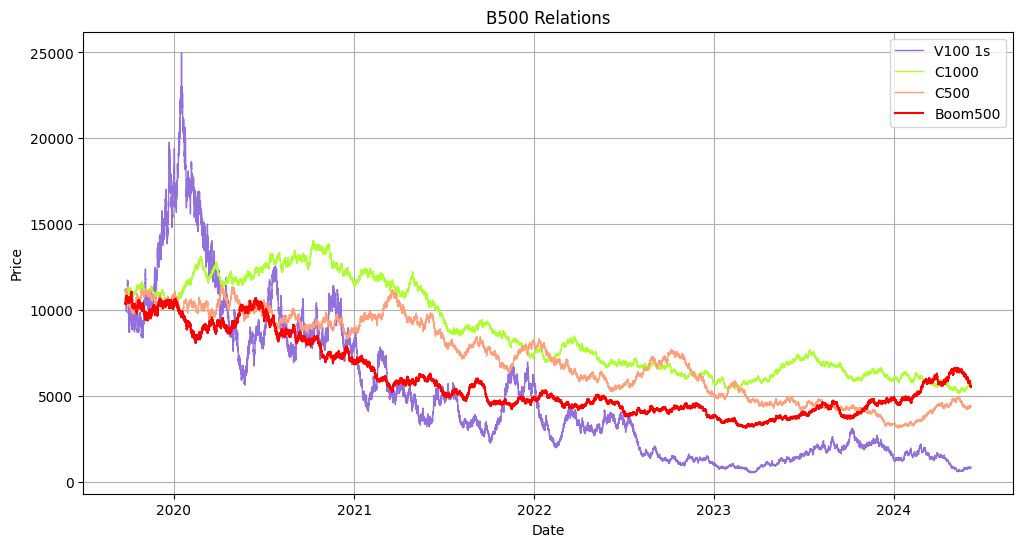

In [8]:
# Create a plot
plt.figure(figsize=(12, 6))


# Plot V100
plt.plot(dff.index, dff['OPEN_v100_1s_1h'], label='V100 1s', color='mediumpurple', linewidth=1)
# Plot C1000
plt.plot(dff.index, dff['OPEN_Crash_1000_1h'], label='C1000', color='greenyellow', linewidth=1)
# Plot C500
plt.plot(dff.index, dff['OPEN_Crash_500_1h'], label='C500', color='lightsalmon', linewidth=1)
# Plot B500
plt.plot(dff.index, dff['OPEN_Boom_500_1h'], label='Boom500', color='red')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('B500 Relations')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

In [19]:
# Interactive plot to view small timeframes

fig = go.Figure()

fig.add_trace(go.Scatter(x=dff.index, y=dff['OPEN_Boom_500_1h'], name='Boom 500', mode='lines', 
                         line=dict(shape='spline',smoothing=1, color='green')))

fig.update_layout(xaxis=dict(title='Date', type='date'),plot_bgcolor='white')

fig.add_trace(go.Scatter(x=dff.index, y=dff['OPEN_Crash_500_1h'], name='Crash 500', mode='lines', 
                         line=dict(shape='spline', smoothing=1, color='red', width=1), 
                         yaxis='y2', opacity=0.5 ))

fig.add_trace(go.Scatter(x=dff.index, y=dff['OPEN_Crash_1000_1h'], name='Crash 1000', mode='lines', 
                         line=dict(shape='spline', smoothing=1, color='gold', width=1), 
                         yaxis='y2', opacity=0.5 ))

fig.update_layout(yaxis2=dict( overlaying='y', side='right', range=[0, 14000]))

fig.show()

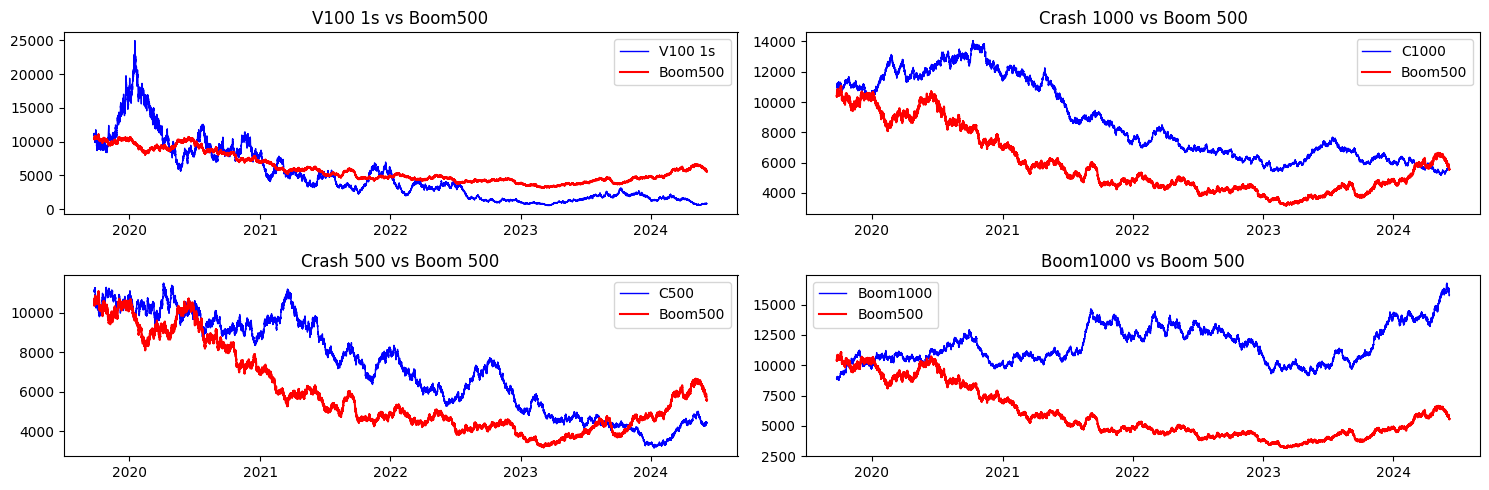

In [17]:

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 5))


axs[0,0].plot(dff.index, dff['OPEN_v100_1s_1h'], label='V100 1s', color='blue', linewidth = 1)
axs[0,0].plot(dff.index, dff['OPEN_Boom_500_1h'], label='Boom500', color='red')
axs[0,0].set_title('V100 1s vs Boom500')
axs[0,0].legend()

axs[0,1].plot(dff.index, dff['OPEN_Crash_1000_1h'], label='C1000', color='blue', linewidth = 1)
axs[0,1].plot(dff.index, dff['OPEN_Boom_500_1h'], label='Boom500', color='red')
axs[0,1].set_title('Crash 1000 vs Boom 500')
axs[0,1].legend()

axs[1,0].plot(dff.index, dff['OPEN_Crash_500_1h'], label='C500', color='blue', linewidth = 1)
axs[1,0].plot(dff.index, dff['OPEN_Boom_500_1h'], label='Boom500', color='red')
axs[1,0].set_title('Crash 500 vs Boom 500')
axs[1,0].legend()

axs[1,1].plot(dff.index, dff['OPEN_Boom_1000_1h'], label='Boom1000', color='blue', linewidth = 1)
axs[1,1].plot(dff.index, dff['OPEN_Boom_500_1h'], label='Boom500', color='red')
axs[1,1].set_title('Boom1000 vs Boom 500')
axs[1,1].legend()


plt.tight_layout()
plt.show()

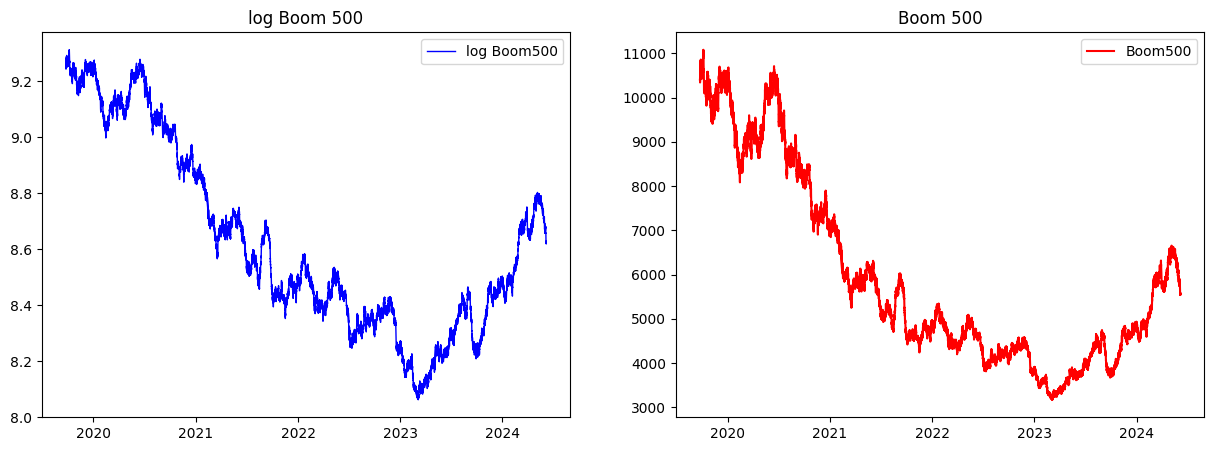

In [16]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))

ax[0].plot(dff.index, np.log(dff['OPEN_Boom_500_1h']), label='log Boom500', color='blue', linewidth = 1)
ax[0].set_title('log Boom 500')
ax[0].legend()

ax[1].plot(dff.index, dff['OPEN_Boom_500_1h'], label='Boom500', color='red')
ax[1].set_title('Boom 500')
ax[1].legend()

plt.show()

## Boom 1000 Correlations

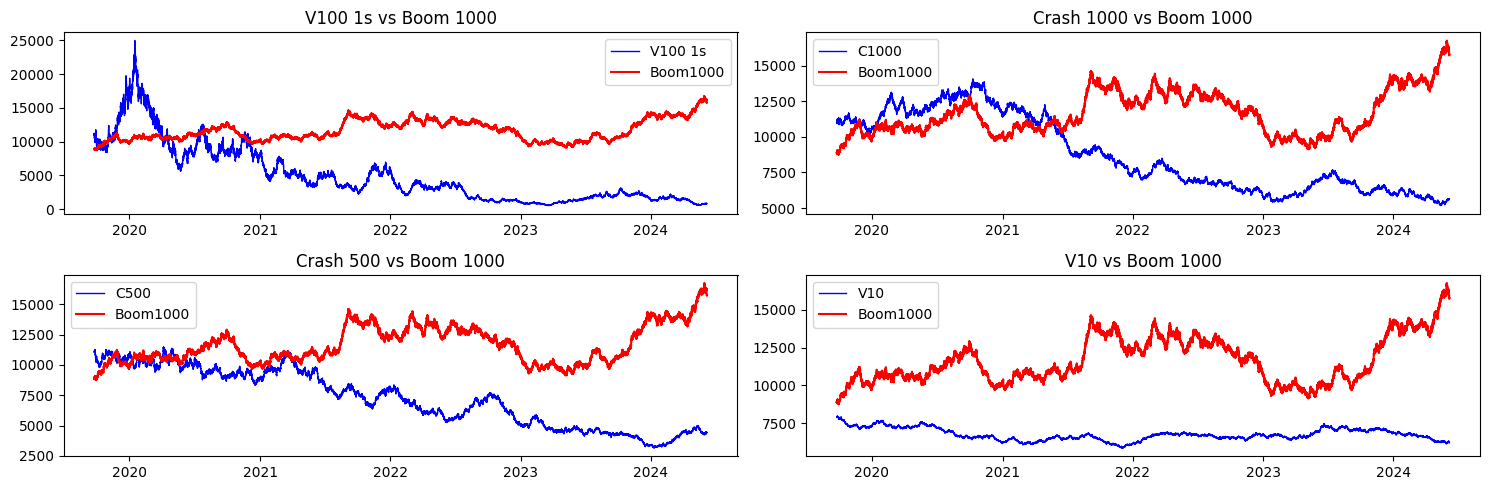

In [18]:

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 5))


axs[0,0].plot(dff.index, dff['OPEN_v100_1s_1h'], label='V100 1s', color='blue', linewidth = 1)
axs[0,0].plot(dff.index, dff['OPEN_Boom_1000_1h'], label='Boom1000', color='red')
axs[0,0].set_title('V100 1s vs Boom 1000')
axs[0,0].legend()

axs[0,1].plot(dff.index, dff['OPEN_Crash_1000_1h'], label='C1000', color='blue', linewidth = 1)
axs[0,1].plot(dff.index, dff['OPEN_Boom_1000_1h'], label='Boom1000', color='red')
axs[0,1].set_title('Crash 1000 vs Boom 1000')
axs[0,1].legend()

axs[1,0].plot(dff.index, dff['OPEN_Crash_500_1h'], label='C500', color='blue', linewidth = 1)
axs[1,0].plot(dff.index, dff['OPEN_Boom_1000_1h'], label='Boom1000', color='red')
axs[1,0].set_title('Crash 500 vs Boom 1000')
axs[1,0].legend()

axs[1,1].plot(dff.index, dff['OPEN_v10_1h'], label='V10', color='blue', linewidth = 1)
axs[1,1].plot(dff.index, dff['OPEN_Boom_1000_1h'], label='Boom1000', color='red')
axs[1,1].set_title('V10 vs Boom 1000')
axs[1,1].legend()


plt.tight_layout()
plt.show()

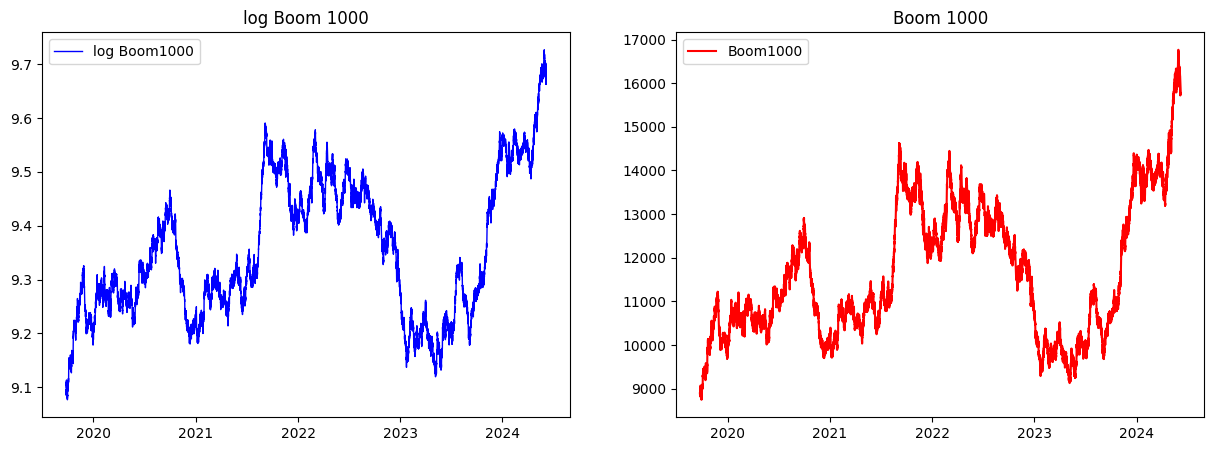

In [17]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))

ax[0].plot(dff.index, np.log(dff['OPEN_Boom_1000_1h']), label='log Boom1000', color='blue', linewidth = 1)
ax[0].set_title('log Boom 1000')
ax[0].legend()

ax[1].plot(dff.index, dff['OPEN_Boom_1000_1h'], label='Boom1000', color='red')
ax[1].set_title('Boom 1000')
ax[1].legend()

plt.show()

## Crash 500 Correlations

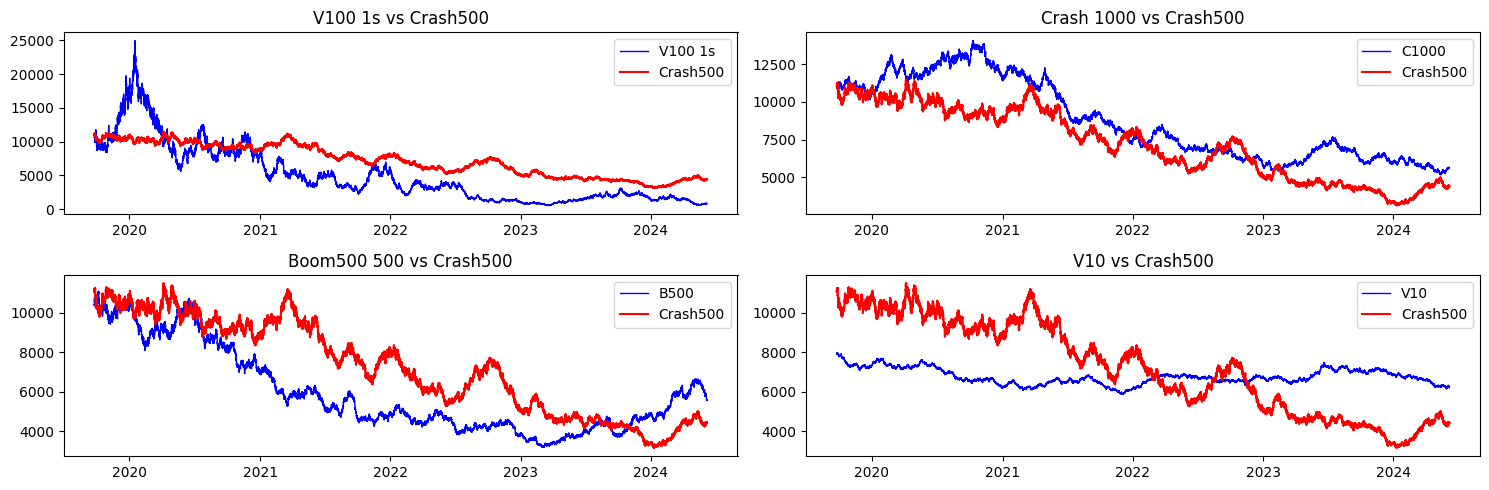

In [19]:

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 5))


axs[0,0].plot(dff.index, dff['OPEN_v100_1s_1h'], label='V100 1s', color='blue', linewidth = 1)
axs[0,0].plot(dff.index, dff['OPEN_Crash_500_1h'], label='Crash500', color='red')
axs[0,0].set_title('V100 1s vs Crash500')
axs[0,0].legend()

axs[0,1].plot(dff.index, dff['OPEN_Crash_1000_1h'], label='C1000', color='blue', linewidth = 1)
axs[0,1].plot(dff.index, dff['OPEN_Crash_500_1h'], label='Crash500', color='red')
axs[0,1].set_title('Crash 1000 vs Crash500')
axs[0,1].legend()

axs[1,0].plot(dff.index, dff['OPEN_Boom_500_1h'], label='B500', color='blue', linewidth = 1)
axs[1,0].plot(dff.index, dff['OPEN_Crash_500_1h'], label='Crash500', color='red')
axs[1,0].set_title('Boom500 500 vs Crash500')
axs[1,0].legend()

axs[1,1].plot(dff.index, dff['OPEN_v10_1h'], label='V10', color='blue', linewidth = 1)
axs[1,1].plot(dff.index, dff['OPEN_Crash_500_1h'], label='Crash500', color='red')
axs[1,1].set_title('V10 vs Crash500')
axs[1,1].legend()


plt.tight_layout()
plt.show()

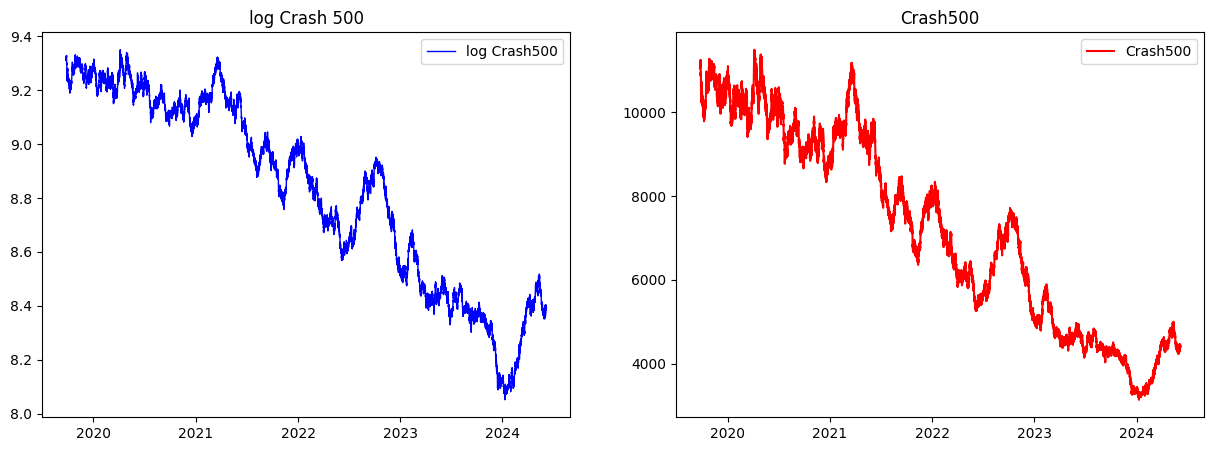

In [19]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))

ax[0].plot(dff.index, np.log(dff['OPEN_Crash_500_1h']), label='log Crash500', color='blue', linewidth = 1)
ax[0].set_title('log Crash 500')
ax[0].legend()

ax[1].plot(dff.index, dff['OPEN_Crash_500_1h'], label='Crash500', color='red')
ax[1].set_title('Crash500')
ax[1].legend()

plt.show()

## Crash 1000 Correelations

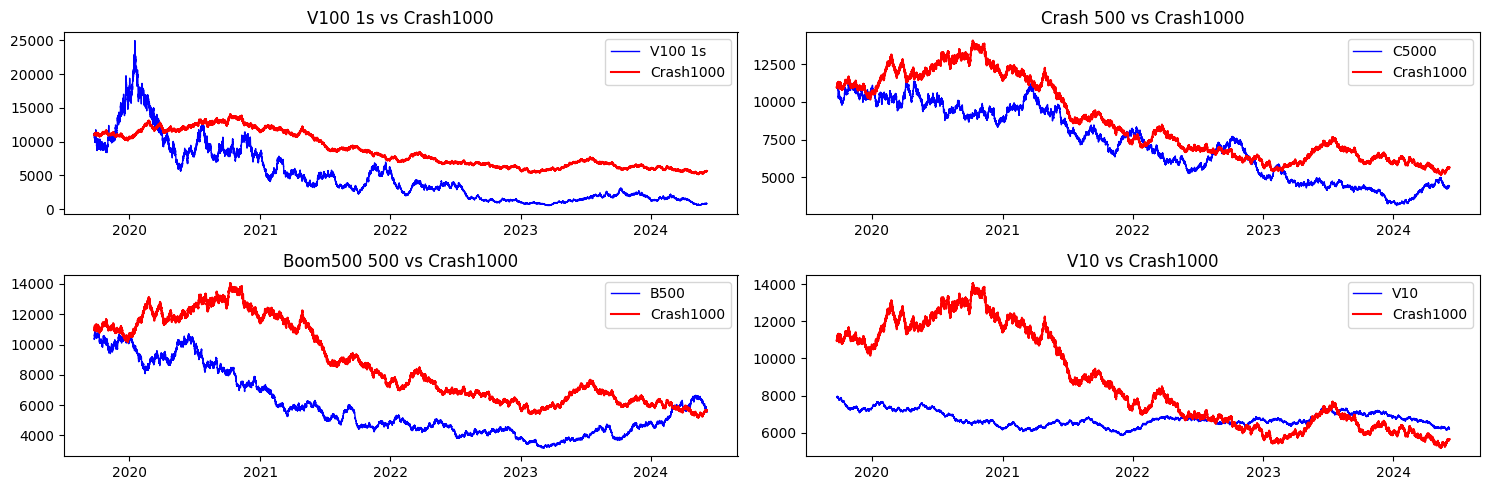

In [6]:

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 5))


axs[0,0].plot(dff.index, dff['OPEN_v100_1s_1h'], label='V100 1s', color='blue', linewidth = 1)
axs[0,0].plot(dff.index, dff['OPEN_Crash_1000_1h'], label='Crash1000', color='red')
axs[0,0].set_title('V100 1s vs Crash1000')
axs[0,0].legend()

axs[0,1].plot(dff.index, dff['OPEN_Crash_500_1h'], label='C5000', color='blue', linewidth = 1)
axs[0,1].plot(dff.index, dff['OPEN_Crash_1000_1h'], label='Crash1000', color='red')
axs[0,1].set_title('Crash 500 vs Crash1000')
axs[0,1].legend()

axs[1,0].plot(dff.index, dff['OPEN_Boom_500_1h'], label='B500', color='blue', linewidth = 1)
axs[1,0].plot(dff.index, dff['OPEN_Crash_1000_1h'], label='Crash1000', color='red')
axs[1,0].set_title('Boom500 500 vs Crash1000')
axs[1,0].legend()

axs[1,1].plot(dff.index, dff['OPEN_v10_1h'], label='V10', color='blue', linewidth = 1)
axs[1,1].plot(dff.index, dff['OPEN_Crash_1000_1h'], label='Crash1000', color='red')
axs[1,1].set_title('V10 vs Crash1000')
axs[1,1].legend()


plt.tight_layout()
plt.show()

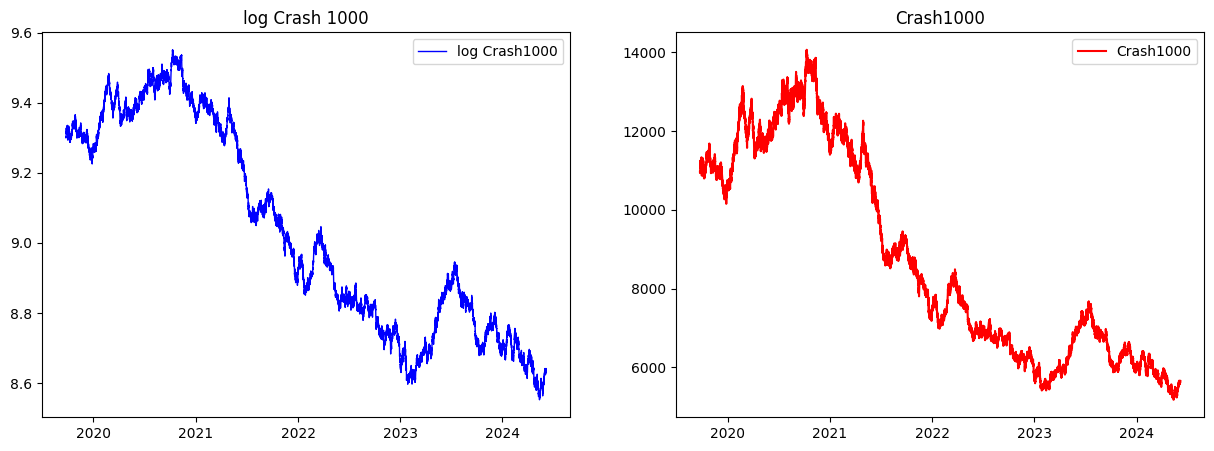

In [20]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))

ax[0].plot(dff.index, np.log(dff['OPEN_Crash_1000_1h']), label='log Crash1000', color='blue', linewidth = 1)
ax[0].set_title('log Crash 1000')
ax[0].legend()

ax[1].plot(dff.index, dff['OPEN_Crash_1000_1h'], label='Crash1000', color='red')
ax[1].set_title('Crash1000')
ax[1].legend()

plt.show()